In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy.stats import linregress

In [2]:
data = pd.read_csv('../data/todos.csv',index_col=0,parse_dates=True)
data

,Ti_ae,Ti_bm,Ti_ca,Ti_za,Ti,To_esolmet
tiempo,,,,,,
2019-06-09 01:00:00,26.188194,26.628872,26.462325,26.472170,26.650584,24.13
2019-06-09 02:00:00,25.911450,26.383318,26.288043,26.197484,26.652891,23.63
2019-06-09 03:00:00,25.650832,26.114065,26.014926,25.931405,26.454455,23.41
2019-06-09 04:00:00,25.004127,25.728279,25.447787,25.503819,26.014895,22.24
2019-06-09 05:00:00,24.860334,25.492268,25.187682,25.270469,25.513036,22.29
...,...,...,...,...,...,...
2019-06-23 19:00:00,27.574269,27.685177,28.267537,27.852287,27.848124,26.95
2019-06-23 20:00:00,27.043309,27.248687,27.605776,27.376560,27.375107,25.26
2019-06-23 21:00:00,26.154304,26.798784,26.838753,26.782967,26.943624,23.62


In [3]:
data.dropna(inplace=True) # cerciorate de no tener NaNs
data

,Ti_ae,Ti_bm,Ti_ca,Ti_za,Ti,To_esolmet
tiempo,,,,,,
2019-06-09 01:00:00,26.188194,26.628872,26.462325,26.472170,26.650584,24.13
2019-06-09 02:00:00,25.911450,26.383318,26.288043,26.197484,26.652891,23.63
2019-06-09 03:00:00,25.650832,26.114065,26.014926,25.931405,26.454455,23.41
2019-06-09 04:00:00,25.004127,25.728279,25.447787,25.503819,26.014895,22.24
2019-06-09 05:00:00,24.860334,25.492268,25.187682,25.270469,25.513036,22.29
...,...,...,...,...,...,...
2019-06-23 19:00:00,27.574269,27.685177,28.267537,27.852287,27.848124,26.95
2019-06-23 20:00:00,27.043309,27.248687,27.605776,27.376560,27.375107,25.26
2019-06-23 21:00:00,26.154304,26.798784,26.838753,26.782967,26.943624,23.62


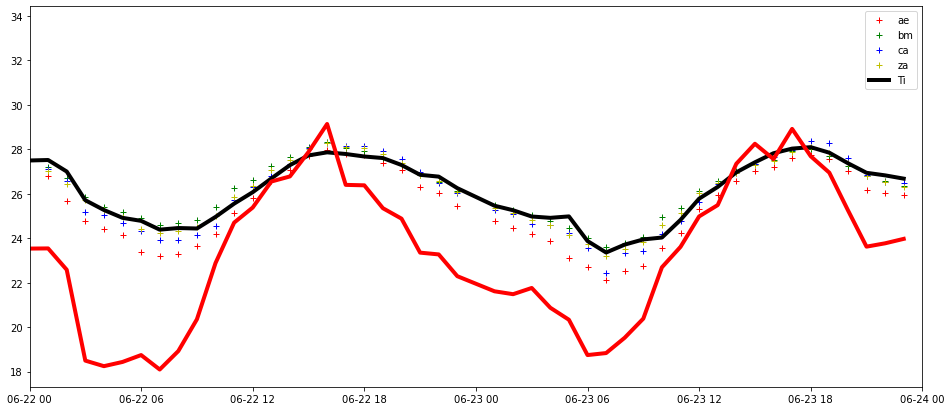

In [4]:
fig, ax = plt.subplots(figsize=(16,7))

fecha1 = parse("2019-06-22")
fecha2 = fecha1 + pd.Timedelta("2D")

ax.set_xlim(fecha1,fecha2)


ax.plot(data.Ti_ae,'r+',label='ae')
ax.plot(data.Ti_bm,'g+',label='bm')
ax.plot(data.Ti_ca,'b+',label='ca')
ax.plot(data.Ti_za,'y+',label='za')
ax.plot(data.Ti,'k-',linewidth=4,label='Ti')
ax.plot(data.To_esolmet,'r-',linewidth=4)
ax.legend()

0.9867058021254594 -0.20025024087804108 0.9540011361111957


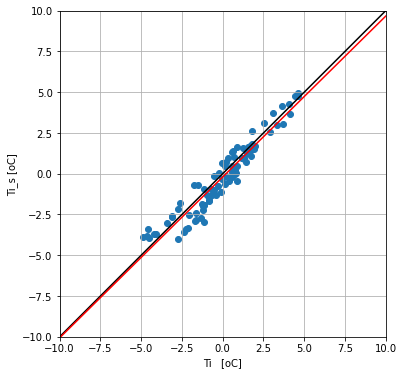

In [5]:
# Para el caso Ti_ae
Ti_s = data.Ti_ae

fig, ax = plt.subplots(figsize=(6,6))


x = np.linspace(-10,10,2)
y = x 

X = np.array( data.Ti-data.Ti.mean()   )
Y = np.array( Ti_s-data.Ti.mean() )
m,b,r_value, p_value,std_err = linregress(X,Y)

ax.scatter(X,Y)
ax.plot(x,y,'k-') 
ax.plot(x,x*m+b,'r-') 


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_box_aspect(1)
ax.set_ylabel('Ti_s [oC]')
ax.set_xlabel('Ti   [oC]')
ax.grid()
print(m,b,r_value)

0.7966382598095049 0.4152522581377032 0.9602713574571728


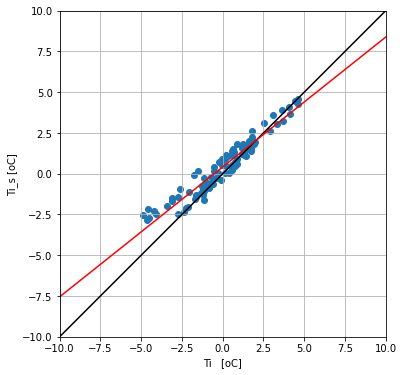

In [6]:
# Para el caso Ti_ae
Ti_s = data.Ti_bm

fig, ax = plt.subplots(figsize=(6,6))


x = np.linspace(-10,10,2)
y = x 

X = np.array( data.Ti-data.Ti.mean()   )
Y = np.array( Ti_s-data.Ti.mean() )
m,b,r_value, p_value,std_err = linregress(X,Y)

ax.scatter(X,Y)
ax.plot(x,y,'k-') 
ax.plot(x,x*m+b,'r-') 


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_box_aspect(1)
ax.set_ylabel('Ti_s [oC]')
ax.set_xlabel('Ti   [oC]')
ax.grid()
print(m,b,r_value)

## Correlaci'on de Pearson

In [7]:
data[['Ti_ae', 'Ti_bm', 'Ti_ca', 'Ti_za','Ti']].corr()

,Ti_ae,Ti_bm,Ti_ca,Ti_za,Ti
Ti_ae,1.000000,0.996277,0.995835,0.997703,0.954001
Ti_bm,0.996277,1.000000,0.993435,0.998669,0.960271
Ti_ca,0.995835,0.993435,1.000000,0.996510,0.957310
Ti_za,0.997703,0.998669,0.996510,1.000000,0.958498
Ti,0.954001,0.960271,0.957310,0.958498,1.000000


In [8]:
nombres = ['Ti_ae', 'Ti_bm', 'Ti_ca', 'Ti_za']
for i in nombres:
    print(i,data.Ti.corr(data[i]))


Ti_ae 0.9540011361111962
Ti_bm 0.9602713574571725
Ti_ca 0.9573103490796757
Ti_za 0.9584980096244052


# dRMSE

In [9]:
(((data.Ti_ae - data.Ti))**2).mean()**.5


0.7016870535423133

In [10]:
for i in nombres:
    print(i,((data[i] - data.Ti)**2).mean()**.5)


Ti_ae 0.7016870535423133
Ti_bm 0.7862931616162209
Ti_ca 0.6725802331188332
Ti_za 0.7026474945587221


# Diferencia promedio de Ti

In [11]:
(data.Ti_ae - data.Ti).mean()


-0.20025024087804105

In [12]:
for i in nombres:
    print(i,(data[i]-data.Ti).mean())


Ti_ae -0.20025024087804105
Ti_bm 0.41525225813770344
Ti_ca 0.24457550359105173
Ti_za 0.31171415605703345


# Diferencia promedio de las temperaturas m'aximas diarias


In [13]:
(data.Ti_ae.resample("1D").max() - data.Ti.resample("1D").max()).mean()


0.05655108731345582

In [14]:
for i in nombres:
    print(i,(data[i].resample("1D").max() - data.Ti.resample("1D").max()).mean())


Ti_ae 0.05655108731345582
Ti_bm 0.17134994230347012
Ti_ca 0.449624437523954
Ti_za 0.2702844070365229


# Diferencia promedio en el FD

In [15]:
df_s = (data.Ti_ae.resample("1D").max() - data.Ti_ae.resample("1D").min()) / (data.To_esolmet.resample("1D").max() - data.To_esolmet.resample("1D").min())
df_e = (data.Ti.resample("1D").max() - data.Ti.resample("1D").min()) / (data.To_esolmet.resample("1D").max() - data.To_esolmet.resample("1D").min())

(df_s - df_e).mean()


0.04713364283415139

In [16]:
for i in nombres:
    df_s = (data[i].resample("1D").max() - data[i].resample("1D").min()) / (data.To_esolmet.resample("1D").max() - data.To_esolmet.resample("1D").min())
    df_e = (data.Ti.resample("1D").max() - data.Ti.resample("1D").min()) / (data.To_esolmet.resample("1D").max() - data.To_esolmet.resample("1D").min())

    print(i,(df_s - df_e).mean())


Ti_ae 0.04713364283415139
Ti_bm -0.0439130946704355
Ti_ca 0.04192183829098084
Ti_za -0.007059819765443592
